# Activation functions


- x : the summed up weighted input


In [20]:
import torch
import numpy as np
import matplotlib.pyplot as plt 

print(torch.__version__)

2.2.0


# Binary step function

This is threshold-based activation function. When the summed weighted inputs are sent to it, it either activates/fires the node (passing on its output) if threshold value is reached/surpassed, or it disregrads the input if the value is lower. 

Because this is a linear piecewise (diffrent based on interval) function it generally isn't used in the hidden layers of a network. It usually appears only in the output layer of a binary classification model 
(is this a dog or a cat  ?) 

$$ f(x) = \begin{cases} 0 & \text{if } x < \theta \\ 1 & \text{if } x \geq \theta \end{cases} $$

in this case 0 is the treshold the input(x) has to reach in order for 

In [5]:
def AF_binary_step(x, trenshold):
    if x >= trenshold: 
        return 1
    
    return 0

So lets say we are trying to figure out weather there is a dog or a cat on a picture. If the model predicted a value between 0 and 0.5 there is a dog, if the predicted valze is between 0.51 and 1 then there is a cat.

The output layer node reacives the value 0.7. And then calls its activation function (being binary step in this case). 


In [9]:
node_input = 0.7
model_treshold = 0.5

AF_binary_step(x=node_input, trenshold=model_treshold)

1

The output of a model is 1, meaning there was a cat on the image.

Lets visualize it.

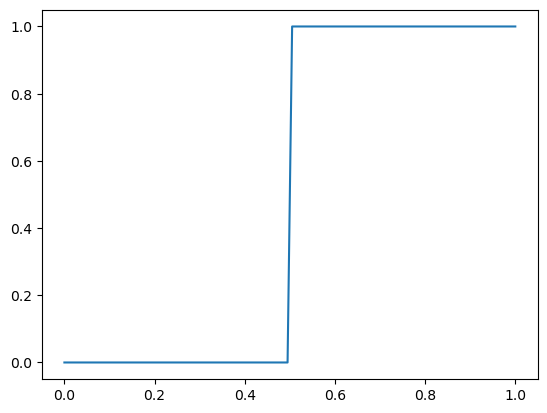

In [30]:
import torch
import matplotlib.pyplot as plt 

# array of 100 values from 0 to 1
x_axis = torch.linspace(0,1, 100)

treshold = 0.5

# mapped values ; what we get when we put an x into out function
y_axis = []

# for each x value we want to map - we run the function
for x in x_axis:
    y_axis.append(AF_binary_step(x, trenshold=treshold))

# draw
plt.plot(x_axis, y_axis)
plt.show()